In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pandas_datareader as data
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tech_list = ['GOOG','AMZN','AAPL','MSFT']
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [3]:
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [ ]:
# other method:-

#stocks = {}
#for stock in tech_list:
    #stocks[stock] = data.DataReader(stock,'yahoo',start,end)
#stocks['AAPL']

#stock_list = ['GOOG','AAPL']
#for stock in tech_list:
    #globals()[stock] = data.DataReader(stock,'yahoo',start='29-05-2019',end='29-05-2020')

#df = data.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start='29-05-2019',end='29-05-2020') ## they give different stock of data
#df.head()

#amzn=data.get_data_yahoo(symbols='AMZN',start='29-05-2019',end='29-05-2020') ## they give single data
#amzn.head()

#df = pd.read_csv('',index_col='Date',parse_dates= True)

In [4]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-12,202.050003,199.149994,199.619995,200.479996,22474900.0,198.510406
2019-08-13,212.139999,200.479996,201.020004,208.970001,47218500.0,206.917007
2019-08-14,206.440002,202.589996,203.160004,202.750000,36547400.0,200.758102
2019-08-15,205.139999,199.669998,203.460007,201.740005,27227400.0,199.758026
2019-08-16,207.160004,203.839996,204.279999,206.500000,27620400.0,204.471252


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-08-12 to 2020-08-12
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


In [6]:
adj_close_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
adj_close_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-12,198.510406,1174.709961,134.139359,1784.920044
2019-08-13,206.917007,1197.270020,136.915222,1824.339966
2019-08-14,200.758102,1164.290039,132.792084,1762.959961
2019-08-15,199.758026,1167.260010,132.494751,1776.119995
2019-08-16,204.471252,1177.599976,134.923050,1792.569946
...,...,...,...,...
2020-08-06,454.790009,1500.099976,216.350006,3225.000000
2020-08-07,444.450012,1494.489990,212.479996,3167.459961
2020-08-10,450.910004,1496.099976,208.250000,3148.159912


In [7]:
type(AAPL)

pandas.core.frame.DataFrame

# Daily Return (Daily Percentage Change)
Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. Daily percentage change is defined by the following formula:

### Daily return = (Today prices - Yesterday price) / Yesterday price
$ Dailyreturn = \frac{Today Price}{Yesterday price} -1$ ( $ r_t = \frac{p_t}{p_{t-1}} -1$ )
This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next.

In [8]:
AAPL['Daily_return'] = AAPL['Close'].pct_change()

In [ ]:
#AAPL['Daily_return']=AAPL['Close']/AAPL['Close'].shift(1)-1

## Log return
Log returns are time additive. Most technical analyses require detrending/normalizing the time series. Log return is a nice way to do it.

In [9]:
AAPL['Daily_return_log'] = np.log(AAPL['Close']/AAPL['Close'].shift())

# Cumulative Daily return
Cumulative return is the entire amount of money an investment has earned for an investor, irrespective of time. Annualized return is the amount of money the investment has earned for the investor in one year.This is different than just the stock price at the current day, because it will take into account the daily returns.

### df[daily_cumulative_return] = np.cumsum ( df [Daily_return] )

In [10]:
AAPL['Cumulative_return'] = np.cumsum(AAPL['Daily_return'])
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,Daily_return,Daily_return_log,Cumulative_return
Date,,,,,,,,,
2019-08-12,202.050003,199.149994,199.619995,200.479996,22474900.0,198.510406,NaN,NaN,NaN
2019-08-13,212.139999,200.479996,201.020004,208.970001,47218500.0,206.917007,0.042348,0.041476,0.042348
2019-08-14,206.440002,202.589996,203.160004,202.750000,36547400.0,200.758102,-0.029765,-0.030217,0.012583
2019-08-15,205.139999,199.669998,203.460007,201.740005,27227400.0,199.758026,-0.004981,-0.004994,0.007602
2019-08-16,207.160004,203.839996,204.279999,206.500000,27620400.0,204.471252,0.023595,0.023321,0.031197


# Cumulative Return (Compound factor)
The compound return is the rate of return, usually expressed as a percentage, that represents the cumulative effect that a series of gains or losses has on an original amount of capital over a period of time
if I invested $1 in the company at the beginning of the time series, how much would is be worth today?
The formula for a cumulative daily return is:
$ i_i = (1+r_t) * i_{t-1} $
Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:
### df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

In [11]:
AAPL['Cumulative_return_Comp'] = (1 + AAPL['Daily_return']).cumprod()

In [12]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,Daily_return,Daily_return_log,Cumulative_return,Cumulative_return_Comp
Date,,,,,,,,,,
2019-08-12,202.050003,199.149994,199.619995,200.479996,22474900.0,198.510406,NaN,NaN,NaN,NaN
2019-08-13,212.139999,200.479996,201.020004,208.970001,47218500.0,206.917007,0.042348,0.041476,0.042348,1.042348
2019-08-14,206.440002,202.589996,203.160004,202.750000,36547400.0,200.758102,-0.029765,-0.030217,0.012583,1.011323
2019-08-15,205.139999,199.669998,203.460007,201.740005,27227400.0,199.758026,-0.004981,-0.004994,0.007602,1.006285
2019-08-16,207.160004,203.839996,204.279999,206.500000,27620400.0,204.471252,0.023595,0.023321,0.031197,1.030028


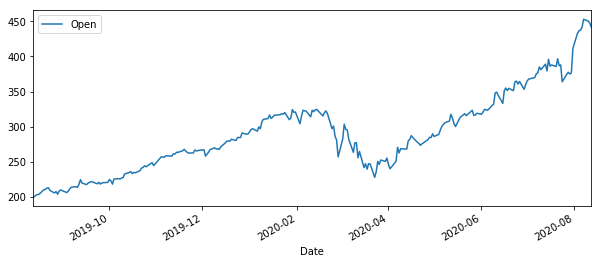

In [13]:
AAPL['Open'].plot(legend=True,figsize=(10,4))

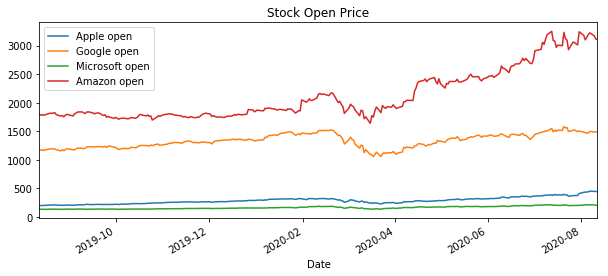

In [14]:
AAPL['Open'].plot(label='Apple open',figsize=(10,4))
GOOG['Open'].plot(label='Google open',figsize=(10,4))
MSFT['Open'].plot(label='Microsoft open',figsize=(10,4))
AMZN['Open'].plot(label='Amazon open',figsize=(10,4))
plt.legend()
plt.title('Stock Open Price')
plt.show()

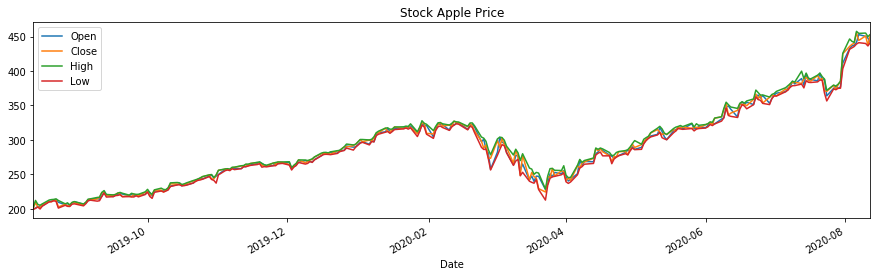

In [15]:
AAPL['Open'].plot(legend=True,figsize=(15,4))
AAPL['Close'].plot(legend=True)
AAPL['High'].plot(legend=True)
AAPL['Low'].plot(legend=True)
plt.title('Stock Apple Price')
plt.show()

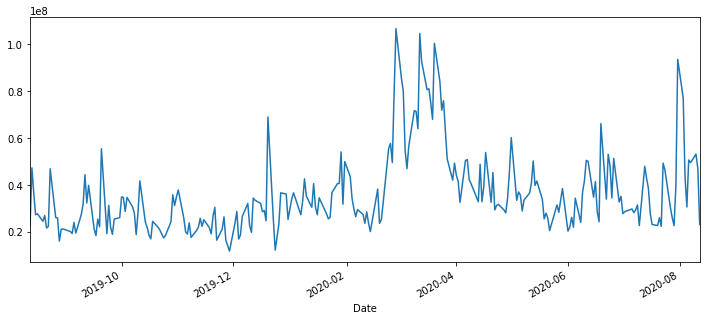

In [16]:
AAPL['Volume'].plot(figsize=(12,5))

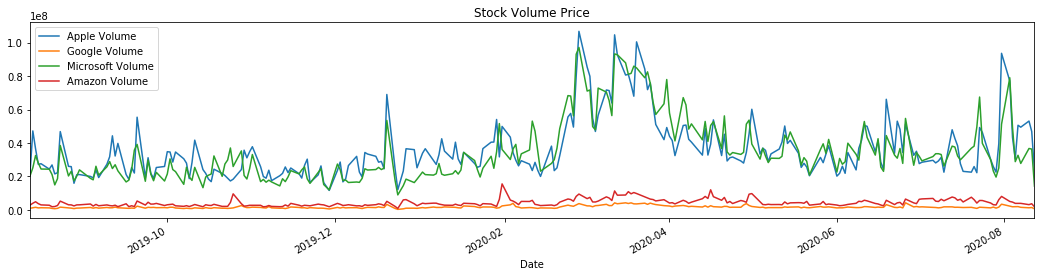

In [17]:
AAPL['Volume'].plot(label='Apple Volume',figsize=(18,4))
GOOG['Volume'].plot(label='Google Volume')
MSFT['Volume'].plot(label='Microsoft Volume')
AMZN['Volume'].plot(label='Amazon Volume')
plt.legend()
plt.title('Stock Volume Price')
plt.show()

In [18]:
#AAPL.iloc[[AAPL['Volume'].argmax()]] why they doesnot work
AAPL.loc[[AAPL['Volume'].argmax()]]

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


,High,Low,Open,Close,Volume,Adj Close,Daily_return,Daily_return_log,Cumulative_return,Cumulative_return_Comp
Date,,,,,,,,,,
2020-02-28,278.410004,256.369995,257.26001,273.359985,106721200.0,272.131348,-0.000585,-0.000585,0.328912,1.363527


In [19]:
AAPL.iloc[188:200]

,High,Low,Open,Close,Volume,Adj Close,Daily_return,Daily_return_log,Cumulative_return,Cumulative_return_Comp
Date,,,,,,,,,,
2020-05-11,317.049988,307.239990,308.100006,315.010010,36405900.0,314.443054,0.015735,0.015613,0.525767,1.571279
2020-05-12,319.690002,310.910004,317.829987,311.410004,40575300.0,310.849548,-0.011428,-0.011494,0.514339,1.553322
2020-05-13,315.950012,303.209991,312.149994,307.649994,50155600.0,307.096283,-0.012074,-0.012148,0.502264,1.534567
2020-05-14,309.790009,301.529999,304.510010,309.540009,39732300.0,308.982910,0.006143,0.006125,0.508408,1.543994
2020-05-15,307.899994,300.209991,300.350006,307.709991,41587100.0,307.156189,-0.005912,-0.005930,0.502496,1.534866
2020-05-18,316.500000,310.320007,313.170013,314.959991,33843100.0,314.393127,0.023561,0.023288,0.526057,1.571030
2020-05-19,318.519989,313.010010,315.029999,313.140015,25432400.0,312.576447,-0.005778,-0.005795,0.520278,1.561951
2020-05-20,319.519989,316.519989,316.679993,319.230011,27876200.0,318.655487,0.019448,0.019261,0.539727,1.592329
2020-05-21,320.890015,315.869995,318.660004,316.850006,25672200.0,316.279755,-0.007455,-0.007483,0.532271,1.580457


In [20]:
AAPL.loc['2020-02-28']

High                      2.784100e+02
Low                       2.563700e+02
Open                      2.572600e+02
Close                     2.733600e+02
Volume                    1.067212e+08
Adj Close                 2.721313e+02
Daily_return             -5.849798e-04
Daily_return_log         -5.851509e-04
Cumulative_return         3.289117e-01
Cumulative_return_Comp    1.363527e+00
Name: 2020-02-28 00:00:00, dtype: float64

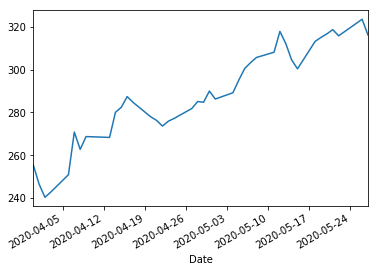

In [21]:
AAPL.iloc[160:200]['Open'].plot()

Answer = IF apple company volume is up but open is low

## Market Cap
we go to closer look of stock

In [22]:
AAPL['Total Trade'] = AAPL['Open']*AAPL['Volume']
GOOG['Total Trade'] = GOOG['Open']*GOOG['Volume']
MSFT['Total Trade'] = MSFT['Open']*MSFT['Volume']
AMZN['Total Trade'] = AMZN['Open']*AMZN['Volume']

In [23]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,Daily_return,Daily_return_log,Cumulative_return,Cumulative_return_Comp,Total Trade
Date,,,,,,,,,,,
2019-08-12,202.050003,199.149994,199.619995,200.479996,22474900.0,198.510406,NaN,NaN,NaN,NaN,4.486439e+09
2019-08-13,212.139999,200.479996,201.020004,208.970001,47218500.0,206.917007,0.042348,0.041476,0.042348,1.042348,9.491863e+09
2019-08-14,206.440002,202.589996,203.160004,202.750000,36547400.0,200.758102,-0.029765,-0.030217,0.012583,1.011323,7.424970e+09
2019-08-15,205.139999,199.669998,203.460007,201.740005,27227400.0,199.758026,-0.004981,-0.004994,0.007602,1.006285,5.539687e+09
2019-08-16,207.160004,203.839996,204.279999,206.500000,27620400.0,204.471252,0.023595,0.023321,0.031197,1.030028,5.642295e+09


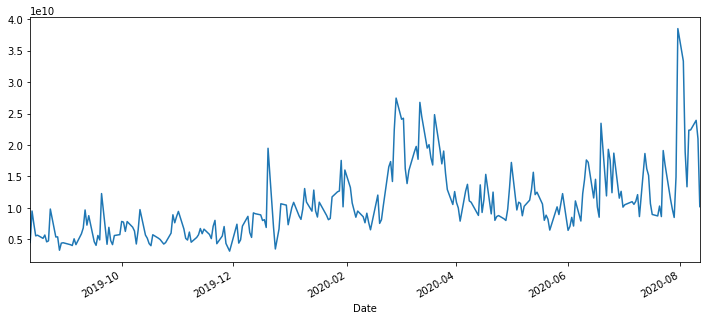

In [24]:
AAPL['Total Trade'].plot(figsize=(12,5))

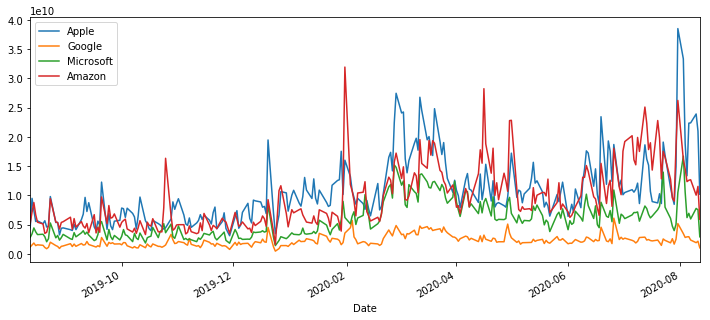

In [25]:
AAPL['Total Trade'].plot(label='Apple',figsize=(12,5))
GOOG['Total Trade'].plot(label='Google')
MSFT['Total Trade'].plot(label='Microsoft')
AMZN['Total Trade'].plot(label='Amazon')
plt.legend()
plt.show()

Answer :- Amazon first positon then the Apple but if i see the vol.apple in first position

In [26]:
AMZN.loc[[AAPL['Total Trade'].argmax()]]

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


,High,Low,Open,Close,Volume,Adj Close,Total Trade
Date,,,,,,,
2020-07-31,3246.820068,3151.0,3244.0,3164.679932,8085500,3164.679932,2.622936e+10


## Moving Average

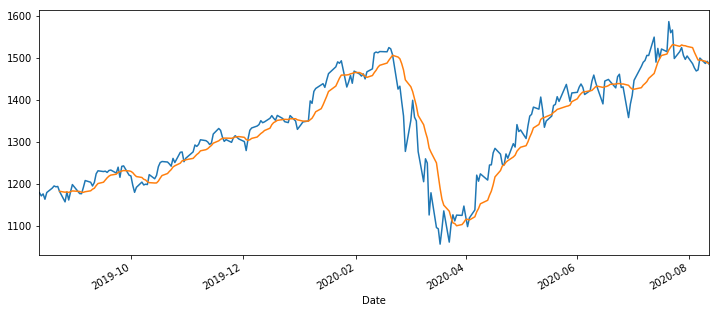

In [27]:
GOOG['Open'].plot(figsize=(12,5))
GOOG['MA10']=GOOG['Open'].rolling(10).mean()
GOOG['MA10'].plot()

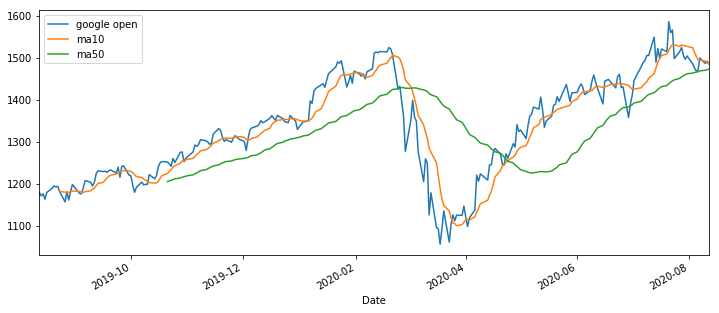

In [28]:
GOOG['Open'].plot(label='google open',figsize=(12,5))
GOOG['MA10']=GOOG['Open'].rolling(10).mean()
GOOG['MA10'].plot(label='ma10')
GOOG['MA50']=GOOG['Open'].rolling(50).mean()
GOOG['MA50'].plot(label='ma50')
plt.legend()
plt.show()

## Correlation and Scatter Matrix

In [29]:
stock_comp = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Open']

In [ ]:
sns.pairplot(stock_comp)

In [ ]:
# other method 
#from pandas.plotting import scatter_matrix
#scatter_matrix(stock_comp,figsize=(8,4));

## Candlestick Chart

In [ ]:
from mpl_finance import candlestick_ohlc

In [ ]:
AAPL['Cumulative_return'].plot()

Answer:- if i put 1 rupees in start date(2019) they give me 7 rupee at the end of end date(2020)